### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Dataset

In [2]:
df = pd.read_csv("data.csv", parse_dates=["PurchaseDate"])

In [4]:
df.head()

,CustomerID,Age,Gender,City,ProductCategory,PurchaseAmount,PaymentMethod,PurchaseDate,Quantity
0,4f2ead92-86f3-4122-8f1e-6d6433214112,37,Other,Surat,Groceries,19938.02,Cash,2025-07-31,1
1,89603a92-a0b9-445a-94b6-ca76fc392fc9,43,Male,Bengaluru,Furniture,3936.98,Debit Card,2025-09-08,4
2,27ea3b7b-e8f7-4db2-b662-124193d9e4f4,32,Male,Delhi,Home Appliances,20345.48,UPI,2025-07-10,9
3,750ae32b-7869-48a3-95d8-5a1bdad2309f,34,Other,Kolkata,Groceries,17919.97,UPI,2025-02-24,8
4,05d25680-2678-463d-a61d-b41173fa0b8a,30,Other,Delhi,Furniture,6681.39,UPI,2025-09-30,1


### Basic Information

In [6]:
print("Shape of Data:", df.shape)

Shape of Data: (1200, 9)


In [7]:
print("Column Names:", df.columns.tolist())

Column Names: ['CustomerID', 'Age', 'Gender', 'City', 'ProductCategory', 'PurchaseAmount', 'PaymentMethod', 'PurchaseDate', 'Quantity']


In [8]:
print("Data Types:\n", df.dtypes)

Data Types:
 CustomerID                 object
Age                         int64
Gender                     object
City                       object
ProductCategory            object
PurchaseAmount            float64
PaymentMethod              object
PurchaseDate       datetime64[ns]
Quantity                    int64
dtype: object


In [9]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 CustomerID         0
Age                0
Gender             0
City               0
ProductCategory    0
PurchaseAmount     0
PaymentMethod      0
PurchaseDate       0
Quantity           0
dtype: int64


### Summary Statistics

In [13]:
print("Summary Statistics: \n", df.describe())

Summary Statistics: 
                Age  PurchaseAmount         PurchaseDate     Quantity
count  1200.000000     1200.000000                 1200  1200.000000
mean     41.453333    24461.219258  2024-11-13 04:33:36     5.132500
min      18.000000      103.560000  2023-11-14 00:00:00     1.000000
25%      30.000000    11839.052500  2024-05-10 00:00:00     3.000000
50%      42.000000    24433.150000  2024-11-10 00:00:00     5.000000
75%      53.000000    36703.772500  2025-05-30 06:00:00     7.000000
max      64.000000    49995.270000  2025-11-13 00:00:00     9.000000
std      13.442907    14439.495461                  NaN     2.573026


### Feature Engineering

In [14]:
df["PurchaseYear"] = df["PurchaseDate"].dt.year
df["PurchaseMonth"] = df["PurchaseDate"].dt.to_period("M").astype(str)
df["DayOfWeek"] = df["PurchaseDate"].dt.day_name()

# Single Variable Analysis

#### 1) Age Distribution

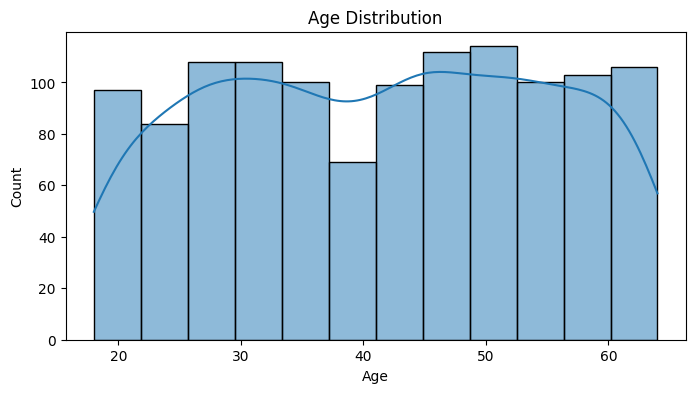

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.show()

#### 2) Purchase Amount Distribution

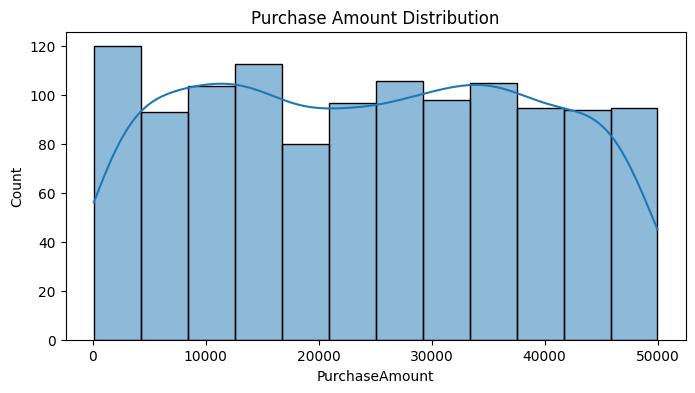

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df["PurchaseAmount"], kde=True)
plt.title("Purchase Amount Distribution")
plt.show()

#### 3) Gender Count

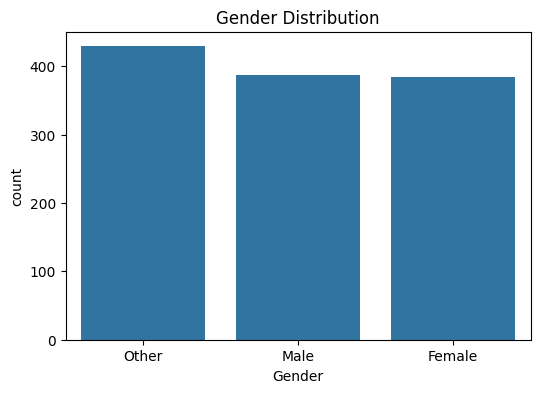

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

# Categorical Analysis

#### 1) Product Category Frequency

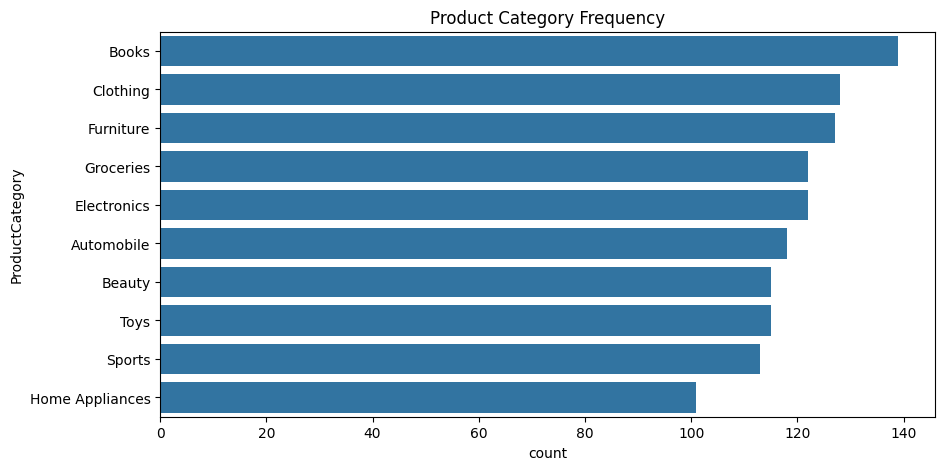

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(y="ProductCategory", data=df, order=df["ProductCategory"].value_counts().index)
plt.title("Product Category Frequency")
plt.show()

#### 2) Payment Method Usage

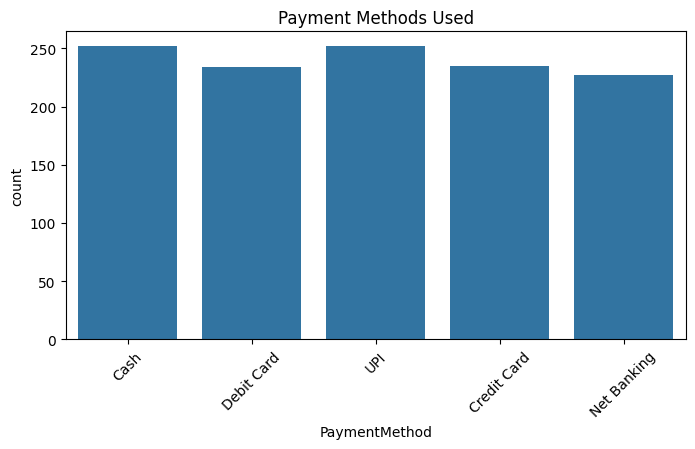

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x="PaymentMethod", data=df)
plt.title("Payment Methods Used")
plt.xticks(rotation=45)
plt.show()

# Multi Variable Analysis

#### 1) Quantity vs Purchase Amount

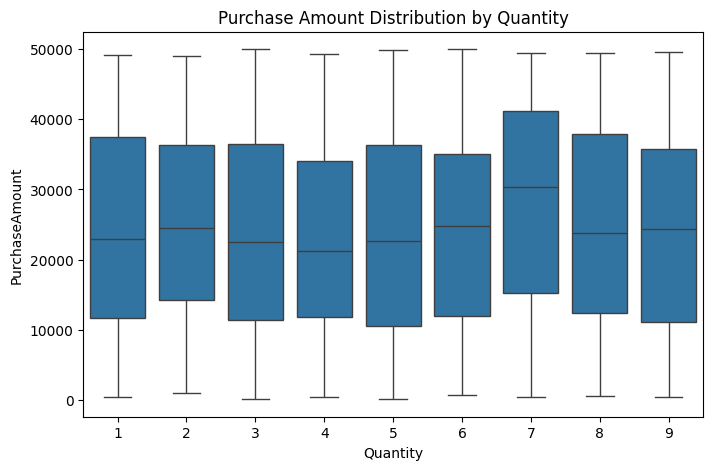

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Quantity", y="PurchaseAmount", data=df)
plt.title("Purchase Amount Distribution by Quantity")
plt.show()

#### 2) City vs Average Purchase Amount

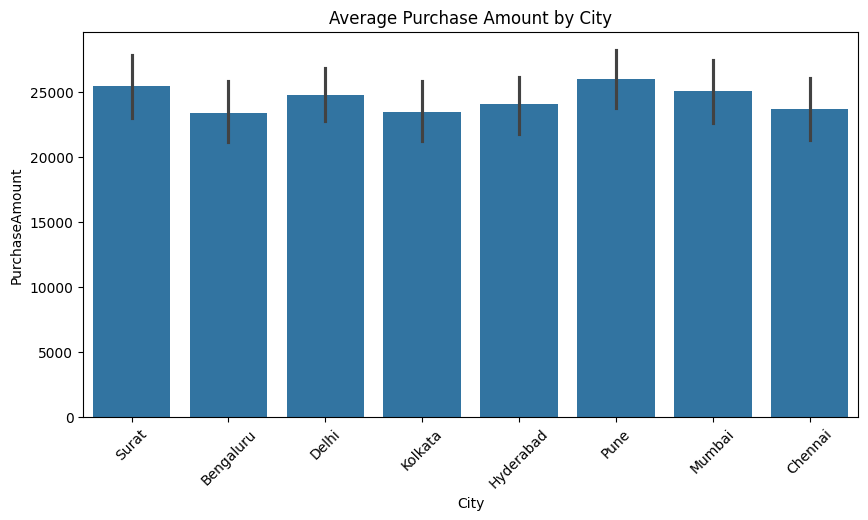

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x="City", y="PurchaseAmount", data=df, estimator=np.mean)
plt.title("Average Purchase Amount by City")
plt.xticks(rotation=45)
plt.show()

# Time Series Analysis

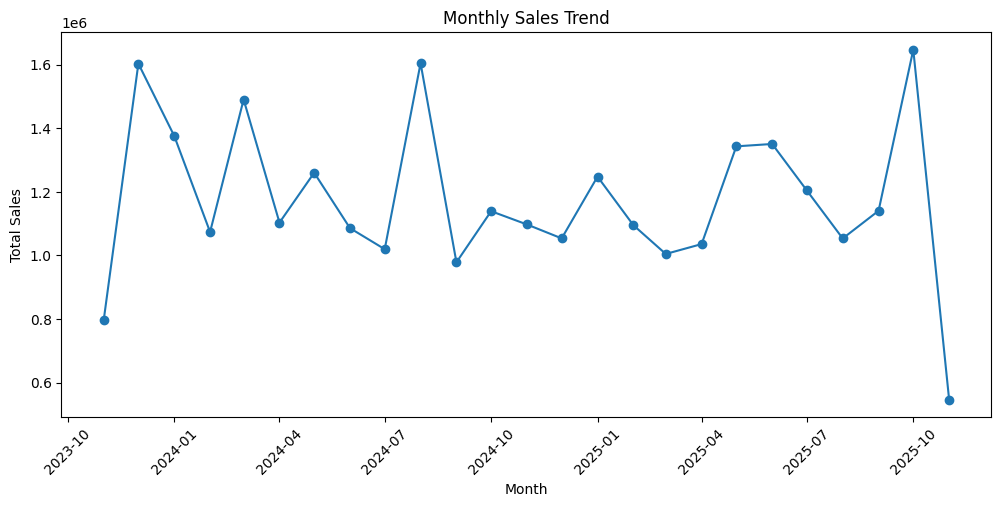

In [22]:
monthly_sales = df.groupby("PurchaseMonth")["PurchaseAmount"].sum().reset_index()
monthly_sales["PurchaseMonth"] = pd.to_datetime(monthly_sales["PurchaseMonth"])

plt.figure(figsize=(12,5))
plt.plot(monthly_sales["PurchaseMonth"], monthly_sales["PurchaseAmount"], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap

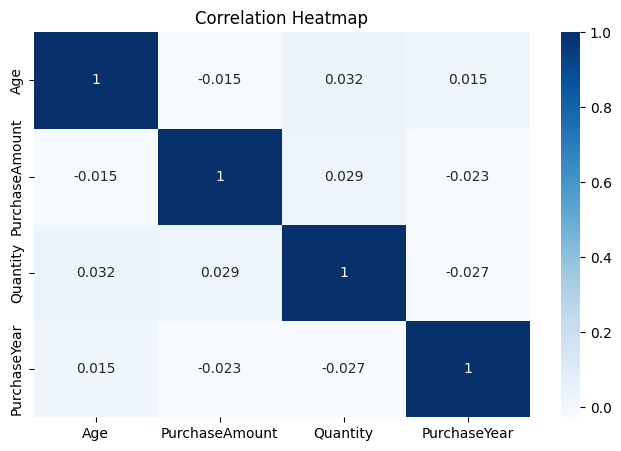

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# Insights

##### 1. Most customers are aged 20–45, making young adults the primary buyers.

##### 2. Product categories like Electronics, Clothing, and Groceries dominate total purchases.

##### 3. Purchase amounts are skewed, with many moderate transactions and few high-value orders.

##### 4. Quantity does not strongly influence purchase amount, indicating costlier items drive revenue.

##### 5. Digital payment options like UPI and cards are the preferred modes of transaction.

##### 6. Urban cities contribute the highest number of purchases and overall revenue.

##### 7. Monthly sales fluctuate, showing clear seasonal or promotional buying trends.

##### 8. A small group of customers generates a significant portion of total spending, highlighting high-value customers.